#**Import Libraries:**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#**Load Data:**

In [4]:
train_data = pd.read_csv("https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-1/data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [5]:
test_data = pd.read_csv("https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-1/data/test.csv")
test_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,male,27.0,1,0,14.4542
1,622,1,1,male,42.0,1,0,52.5542
2,623,1,3,male,20.0,1,1,15.7417
3,624,0,3,male,21.0,0,0,7.8542
4,625,0,3,male,21.0,0,0,16.1000


#**Data Exploration:**

In [6]:
print("Training Data: Rows - " + str(len(train_data))+ ", Columns - " + str(len(train_data.columns)))

Training Data: Rows - 620, Columns - 8


In [7]:
print("Testing data: Rows - " + str(len(test_data))+ ", Columns - "+ str(len(train_data.columns)))

Testing data: Rows - 271, Columns - 8


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  620 non-null    int64  
 1   Survived     620 non-null    int64  
 2   Pclass       620 non-null    int64  
 3   Sex          620 non-null    object 
 4   Age          489 non-null    float64
 5   SibSp        620 non-null    int64  
 6   Parch        620 non-null    int64  
 7   Fare         620 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 38.9+ KB


In [9]:
display(train_data.isnull().head())
display(train_data.isnull().sum())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            131
SibSp            0
Parch            0
Fare             0
dtype: int64

#**Data Preprocessing**
**Missing Data:**

In [10]:
data = [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

0

In [11]:
display(data)

[     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch     Fare
 0              1         0       3    male   22      1      0   7.2500
 1              2         1       1  female   38      1      0  71.2833
 2              3         1       3  female   26      0      0   7.9250
 3              4         1       1  female   35      1      0  53.1000
 4              5         0       3    male   35      0      0   8.0500
 ..           ...       ...     ...     ...  ...    ...    ...      ...
 615          616         1       2  female   24      1      2  65.0000
 616          617         0       3    male   34      1      1  14.4000
 617          618         0       3  female   26      1      0  16.1000
 618          619         1       2  female    4      2      1  39.0000
 619          620         0       2    male   26      0      0  10.5000
 
 [620 rows x 8 columns],
      PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch     Fare
 0            621         0       3  

**Converting Data:**
#####**Sex:**

In [12]:
genders = {"male": 0, "female": 1}
data = [train_data, test_data]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [13]:
display(data)

[     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare
 0              1         0       3    0   22      1      0   7.2500
 1              2         1       1    1   38      1      0  71.2833
 2              3         1       3    1   26      0      0   7.9250
 3              4         1       1    1   35      1      0  53.1000
 4              5         0       3    0   35      0      0   8.0500
 ..           ...       ...     ...  ...  ...    ...    ...      ...
 615          616         1       2    1   24      1      2  65.0000
 616          617         0       3    0   34      1      1  14.4000
 617          618         0       3    1   26      1      0  16.1000
 618          619         1       2    1    4      2      1  39.0000
 619          620         0       2    0   26      0      0  10.5000
 
 [620 rows x 8 columns],
      PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare
 0            621         0       3    0   22      1      0  14.4542
 1     

**PassengerId:**

In [14]:
train_data = train_data.drop(['PassengerId'],axis=1)
test_data = test_data.drop(['PassengerId'],axis=1)

In [15]:
data = [train_data,test_data]
display(data)

[     Survived  Pclass  Sex  Age  SibSp  Parch     Fare
 0           0       3    0   22      1      0   7.2500
 1           1       1    1   38      1      0  71.2833
 2           1       3    1   26      0      0   7.9250
 3           1       1    1   35      1      0  53.1000
 4           0       3    0   35      0      0   8.0500
 ..        ...     ...  ...  ...    ...    ...      ...
 615         1       2    1   24      1      2  65.0000
 616         0       3    0   34      1      1  14.4000
 617         0       3    1   26      1      0  16.1000
 618         1       2    1    4      2      1  39.0000
 619         0       2    0   26      0      0  10.5000
 
 [620 rows x 7 columns],      Survived  Pclass  Sex  Age  SibSp  Parch     Fare
 0           0       3    0   22      1      0  14.4542
 1           1       1    0   38      1      0  52.5542
 2           1       3    0   26      1      1  15.7417
 3           0       3    0   35      0      0   7.8542
 4           0       3

**Age:**

In [16]:
data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


**Fare:**

In [17]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [18]:
display(data)

[     Survived  Pclass  Sex  Age  SibSp  Parch  Fare
 0           0       3    0    2      1      0     0
 1           1       1    1    5      1      0     3
 2           1       3    1    3      0      0     1
 3           1       1    1    5      1      0     3
 4           0       3    0    5      0      0     1
 ..        ...     ...  ...  ...    ...    ...   ...
 615         1       2    1    3      1      2     3
 616         0       3    0    5      1      1     1
 617         0       3    1    3      1      0     2
 618         1       2    1    0      2      1     3
 619         0       2    0    3      0      0     1
 
 [620 rows x 7 columns],      Survived  Pclass  Sex  Age  SibSp  Parch  Fare
 0           0       3    0    2      1      0     2
 1           1       1    0    5      1      0     3
 2           1       3    0    3      1      1     2
 3           0       3    0    5      0      0     0
 4           0       3    0    5      0      0     2
 ..        ...     .

#**Creating New Features:**

**Age_class:**

In [19]:
data = [train_data,test_data]
for df in data:
  df['Age_class'] = df['Age']*df['Pclass']

**Fare_Per_Person:**

In [20]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['SibSp']+dataset['Parch']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

**Family_size:**

In [21]:
for dataset in data:
    dataset['Family'] = dataset['SibSp']+dataset['Parch']+1    

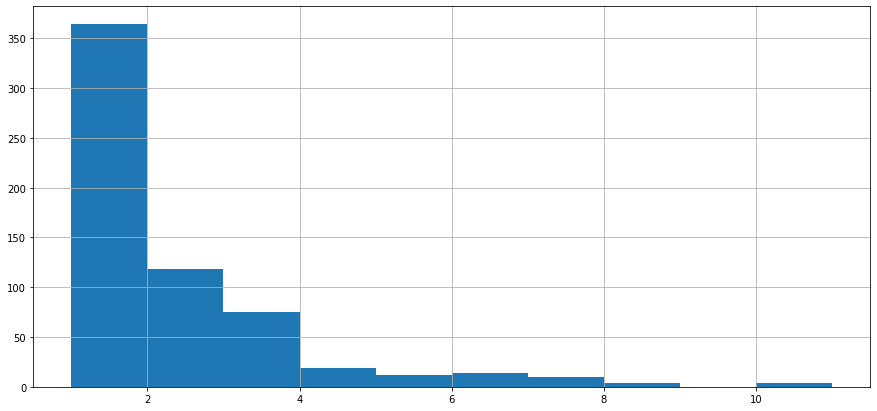

In [22]:
train_data['Family'].hist(figsize=(15,7))

In [23]:
display(data)

[     Survived  Pclass  Sex  Age  ...  Fare  Age_class  Fare_Per_Person  Family
 0           0       3    0    2  ...     0          6                0       2
 1           1       1    1    5  ...     3          5                1       2
 2           1       3    1    3  ...     1          9                1       1
 3           1       1    1    5  ...     3          5                1       2
 4           0       3    0    5  ...     1         15                1       1
 ..        ...     ...  ...  ...  ...   ...        ...              ...     ...
 615         1       2    1    3  ...     3          6                0       4
 616         0       3    0    5  ...     1         15                0       3
 617         0       3    1    3  ...     2          9                1       2
 618         1       2    1    0  ...     3          0                0       4
 619         0       2    0    3  ...     1          6                1       1
 
 [620 rows x 10 columns],
      Surviv

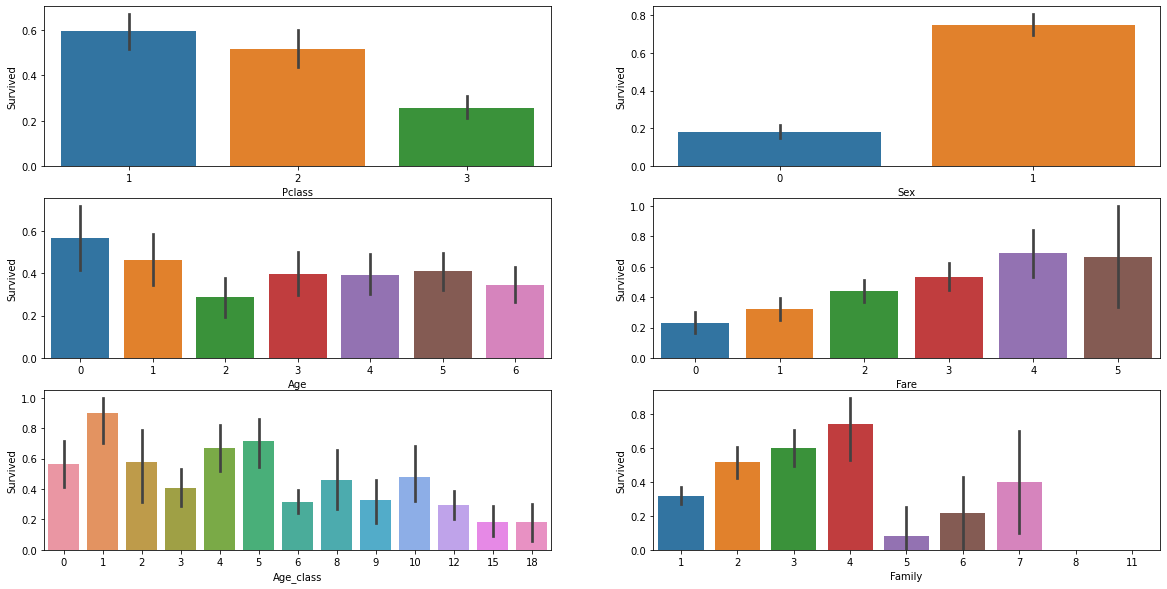

In [24]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sb.barplot(x = 'Pclass', y = 'Survived', data = train_data)
plt.subplot(322)
sb.barplot(x = 'Sex', y = 'Survived', data = train_data)
plt.subplot(323)
sb.barplot(x = 'Age', y = 'Survived', data = train_data)
plt.subplot(324)
sb.barplot(x = 'Fare', y = 'Survived', data = train_data)
plt.subplot(325)
sb.barplot(x = 'Age_class', y = 'Survived', data = train_data)
plt.subplot(326)
sb.barplot(x = 'Family', y = 'Survived', data = train_data)


#**Model**

In [25]:
X_train = train_data.drop(["Survived"],axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop(["Survived"],axis=1)
Y_test = test_data["Survived"]

###**With-out skelearn**

In [27]:
from math import exp
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output
def optimize(x, y,learning_rate,iterations,parameters): 
    size = x.shape[0]
    weight = parameters["weight"] 
    bias = parameters["bias"]
    for i in range(iterations): 
        sigma = sigmoid(np.dot(x, weight) + bias)
        loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
        dW = 1/size * np.dot(x.T, (sigma - y))
        db = 1/size * np.sum(sigma - y)
        weight -= learning_rate * dW
        bias -= learning_rate * db 
    
    parameters["weight"] = weight
    parameters["bias"] = bias
    return parameters
def binary_cross_entropy(actual, predicted):
	  sum_score = 0.0
	  for i in range(len(actual)):
		   sum_score += actual[i] * log(1e-15 + predicted[i])
	  mean_sum_score = 1.0 / len(actual) * sum_score
	  return -mean_sum_score    

In [28]:
init_parameters = {} 
init_parameters["weight"] = np.zeros(X_train.shape[1])
init_parameters["bias"] = 0

In [29]:
def train(x, y, learning_rate,iterations):
    parameters_out = optimize(x, y, learning_rate, iterations ,init_parameters)
    return parameters_out

In [30]:
out = train(X_train, Y_train, learning_rate=0.02,iterations=300)

In [31]:
out

{'bias': 0.009321557930199556,
 'weight': array([-0.1709445 ,  0.62308399,  0.07485563, -0.1370275 ,  0.07626389,
         0.20847647, -0.09945053, -0.03997777, -0.05144206])}

In [32]:
out_values = np.dot(X_train,out["weight"])+out["bias"]
pred = sigmoid(out_values) 
y = [1 if p >= 0.5 else 0 for p in pred]

In [35]:
accuracy = 0
for i in range(len(y)):
    if y[i] == Y_train.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y)}")


Accuracy = 0.714516129032258


In [36]:
out_values = np.dot(X_test,out["weight"])+out["bias"]
pred = sigmoid(out_values) 
y = [1 if p >= 0.5 else 0 for p in pred]

In [37]:
accuracy = 0
for i in range(len(y)):
    if y[i] == Y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y)}")

Accuracy = 0.7859778597785978


###**With sklearn**

####**Importing Libraries:**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [39]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

Y_pred = log_reg.predict(X_test)

Y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0])

In [40]:
accuracy_score(Y_pred, Y_test)

0.7970479704797048

In [41]:
confusion_matrix(Y_pred, Y_test)


array([[152,  34],
       [ 21,  64]])

In [42]:
f1_score(Y_pred, Y_test)

0.6994535519125683

In [43]:
log_loss(Y_pred,Y_test)

7.0098150849915655

In [44]:
Y_pred = log_reg.predict(X_train)

In [45]:
Y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [46]:
accuracy_score(Y_pred, Y_train)

0.8096774193548387

In [47]:
confusion_matrix(Y_pred, Y_train)

array([[327,  69],
       [ 49, 175]])

In [48]:
f1_score(Y_pred, Y_train)

0.7478632478632479

In [49]:
log_loss(Y_pred,Y_train)

6.573598043261523